In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"flaviodipalopolimi","key":"b16caab9c9b8a0ffd2353fafb0be9a58"}'}

In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

ref                                                 title                                               size  lastUpdated          downloadCount  
--------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
kaggle/kaggle-survey-2018                           2018 Kaggle ML & DS Survey Challenge                 4MB  2018-11-03 22:35:07           2015  
lava18/google-play-store-apps                       Google Play Store Apps                               2MB  2018-09-18 20:49:49          17532  
xvivancos/transactions-from-a-bakery                Transactions from a bakery                         113KB  2018-09-05 23:42:32           8726  
census/family-households-with-married-couples-data  Family Households with Married Couples Data          2KB  2018-11-07 09:42:49           1122  
martinellis/nhl-game-data                           NHL Game Data                                      120MB  2018-09-

In [8]:
!kaggle competitions download -c human-protein-atlas-image-classification

  0% 0.00/446k [00:00<?, ?B/s]
100% 446k/446k [00:00<00:00, 70.5MB/s]
  0% 0.00/1.22M [00:00<?, ?B/s]
100% 1.22M/1.22M [00:00<00:00, 127MB/s]
100% 4.36G/4.37G [00:31<00:00, 142MB/s]
100% 4.37G/4.37G [00:31<00:00, 147MB/s]
100% 13.1G/13.1G [01:39<00:00, 145MB/s]
100% 13.1G/13.1G [01:39<00:00, 142MB/s]


In [0]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
from tensorflow.contrib import rnn


%matplotlib inline  




In [0]:
from google.colab import drive
drive.mount('/content/gdrive')


# Data Exploration

In [0]:
train_labels = pd.read_csv("train.csv")


In [19]:
train_labels.head()

,Id,Target
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18


In [20]:
#How many samples do we have ? 
train_labels.shape[0]

31072

In [0]:
#We report here all the label dictionary 

label_names = {
    0:  "Nucleoplasm",  
    1:  "Nuclear membrane",   
    2:  "Nucleoli",   
    3:  "Nucleoli fibrillar center",   
    4:  "Nuclear speckles",
    5:  "Nuclear bodies",   
    6:  "Endoplasmic reticulum",   
    7:  "Golgi apparatus",   
    8:  "Peroxisomes",   
    9:  "Endosomes",   
    10:  "Lysosomes",   
    11:  "Intermediate filaments",   
    12:  "Actin filaments",   
    13:  "Focal adhesion sites",   
    14:  "Microtubules",   
    15:  "Microtubule ends",   
    16:  "Cytokinetic bridge",   
    17:  "Mitotic spindle",   
    18:  "Microtubule organizing center",   
    19:  "Centrosome",   
    20:  "Lipid droplets",   
    21:  "Plasma membrane",   
    22:  "Cell junctions",   
    23:  "Mitochondria",   
    24:  "Aggresome",   
    25:  "Cytosol",   
    26:  "Cytoplasmic bodies",   
    27:  "Rods & rings"
}

In [0]:
reverse_train_labels = dict((v,k) for k,v in label_names.items())

def fill_targets(row):
    row.Target = np.array(row.Target.split(" ")).astype(np.int)
    for num in row.Target:
        name = label_names[int(num)]
        row.loc[name] = 1
    return row

#Labels that occur most often


In [22]:
for key in label_names.keys():
    train_labels[label_names[key]] = 0
train_labels = train_labels.apply(fill_targets, axis=1)
train_labels.head()

,Id,Target,Nucleoplasm,Nuclear membrane,Nucleoli,Nucleoli fibrillar center,Nuclear speckles,Nuclear bodies,Endoplasmic reticulum,Golgi apparatus,...,Microtubule organizing center,Centrosome,Lipid droplets,Plasma membrane,Cell junctions,Mitochondria,Aggresome,Cytosol,Cytoplasmic bodies,Rods & rings
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,"[16, 0]",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,"[7, 1, 2, 0]",1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,[5],0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,[1],0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,[18],0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


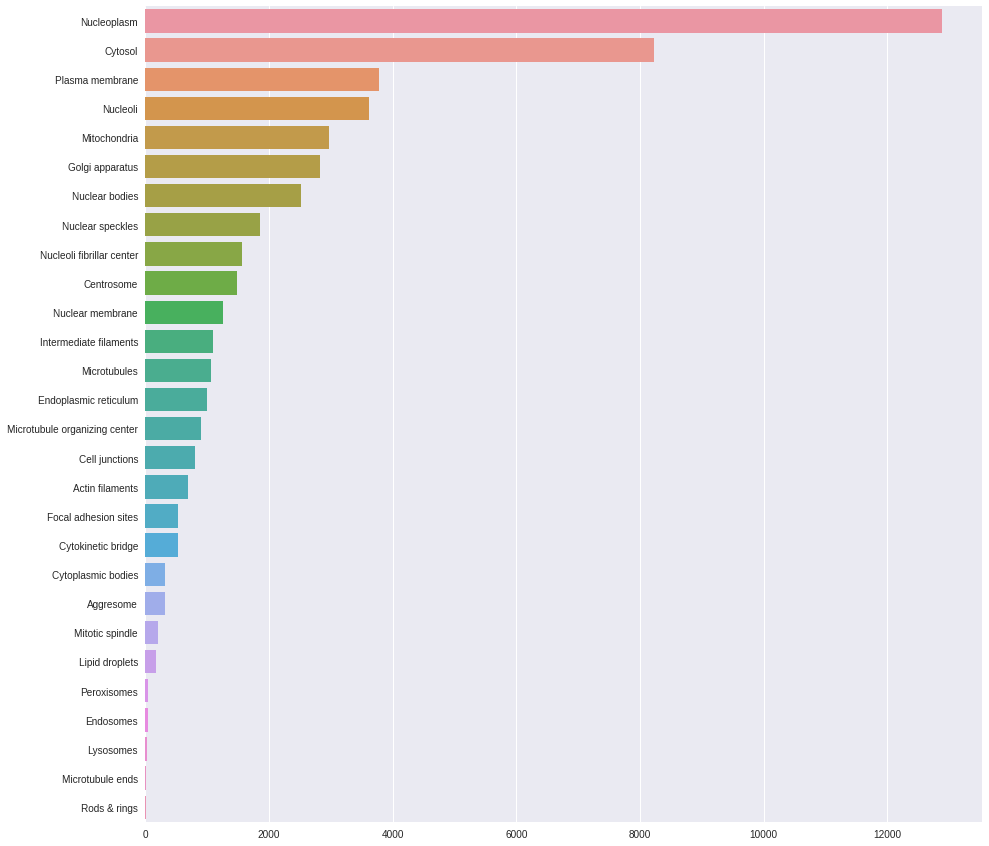

In [23]:
target_counts = train_labels.drop(["Id", "Target"],axis=1).sum(axis=0).sort_values(ascending=False)
plt.figure(figsize=(15,15))
sns.barplot(y=target_counts.index.values, x=target_counts.values, order=target_counts.index)

#Consideration on label distribution

We can see that most common protein structures belong to coarse grained cellular components like the plasma membrane, the cytosol and the nucleus.
In contrast small components like the lipid droplets, peroxisomes, endosomes, lysosomes, microtubule ends, rods and rings are very seldom in our train data. For these classes the prediction will be very difficult as we have only a few examples that may not cover all variabilities and as our model probably will be confused during ins learning process by the major classes. Due to this confusion we will make less accurate predictions on the minor classes.
Consequently accuracy is not the right score here to measure your performance and validation strategy should be very fine.

In [0]:
#https://www.quandl.com/api/v3/datasets/WIKI/FB/data.csv
def date_obj_to_str(date_obj):
  return date_obj.strftime('%Y-%m-%d')

def save_pickle(something, path):
  if not os.path.exists(os.path.dirname(path)):
    os.makedirs(os.path.dirname(path))
  with open(path, 'wb') as fh:
    pickle.dump(something, fh, pickle.DEFAULT_PROTOCOL)
    
def load_pickle(path):
  with open(path, 'rb') as fh:
    return pickle.load(fh)

def fetch_stock_price(symbol,from_date,to_date,cache_path= './tmp/prices/'):
  assert(from_date <= to_date)
  filename = "{}_{}_{}.pk".format(symbol,str(from_date),str(to_date))
  price_filepath = os.path.join(cache_path,filename)
  try:
    prices = load_pickle(price_filepath)
    print("Data Loaded from local")  
  except: 
    historic = quandl.get("WIKI/"+symbol,start_date=date_obj_to_str(from_date),end_date=date_obj_to_str(to_date))
    prices = historic["Adj. Close"].tolist()
    save_pickle(prices,price_filepath)
  return prices 

def format_dataset (values, temporal_features):
  feat_split = [values[i:i+temporal_features] for i in range(len(values)-temporal_features)]
  feats = np.vstack(feat_split)
  labels =np.array(values[temporal_features:])
  return feats,labels

def matrix_to_array(m):
  return np.asarray(m).reshape(-1)

def evaluate_ts(features,y_true,y_pred):
  print("Evaluation of the predictions:")
  print("MSE:",np.mean(np.square(y_true-y_pred)))
  print("mae:",np.mean(np.abs(y_true-y_pred)))
  
  print("Benchmark: if prediction == last feature")
  print("MSE:",np.mean(np.square(features[:,1] - y_true)))
  print("mae:",np.mean(np.abs(features[:,-1]-y_true)))
  
  plt.plot(matrix_to_array(y_true),'b')
  plt.plot(matrix_to_array(y_pred),'r--')
  plt.xlabel("Days")
  plt.ylabel("Predicted and True values")
  plt.title("Predicte(Red) VS Real (Blue)")
  plt.show()

  error=np.abs(matrix_to_array(y_pred)-matrix_to_array(y_true))

  plt.plot(error,'r')
  fit = np.polyfit(range(len(error)),error,deg=1)
  plt.plot(fit[0]*range(len(error))+fit[1],'--')
  plt.xlabel("Days")
  plt.ylabel("Prediction error L1 norm")
  plt.title("Prediction error (absolute) and trendline")
  plt.show()
  
def fetch_cosine_values(seq_len,frequency=0.01,noise=0.1):
  np.random.seed(101)
  x = np.arange(0.0, seq_len, 1.0)
  return np.cos(2*np.pi*frequency*x)+np.random.uniform(low=-noise, high=noise,size=seq_len)



In [0]:
from tensorflow.contrib import rnn
time_dimension = 20
#Data loading
df = pd.read_csv('/content/gdrive/My Drive/algo_stuff/Gdax_ETHUSD.csv')
df = df.reindex(index=df.index[::-1])
cos_values = np.array(df[['Open']]).flatten()
print(cos_values)

mini_X,mini_Y = format_dataset(cos_values,time_dimension)
print(mini_X.shape)
print(mini_Y.shape)


In [0]:
tf.reset_default_graph()
tf.set_random_seed(101)

feat_dimension = 20

data_len = mini_X.shape[0]
print(data_len)

#test_size = train_size -feat_dimension

learning_rate = 0.05
optimizer = tf.train.AdamOptimizer
n_epochs = 1000
mini_1 = mini_X
mini_2 = mini_X[-1500:-500]
plt.plot(mini_1,'b')
len(mini_2)


In [0]:
plt.plot(mini_2,'b')


#Visualize the variance

We pointed out that the prediction can be mad on different time series considering the variance observed in the window.

In [0]:
train_X = mini_X[-2500:-500,:].astype(np.float32)
train_y = mini_Y[-2500:-500].reshape((-1,1)).astype(np.float32)
print(train_X.shape)
print(train_y.shape)
test_X = mini_X[-500:,:].astype(np.float32)
print(test_X)
variance_over_test = np.var(test_X,axis=1)
plt.plot(variance_over_test)
test_y = mini_Y[-500:].reshape((-1,1)).astype(np.float32)
print(test_X.shape)
print(test_y.shape)

# Regression

In [0]:
X_tf = tf.placeholder("float",shape=(None,feat_dimension),name="X")
y_tf = tf.placeholder("float",shape=(None,1),name="y")

def regression_ANN(x, weights, biasese):
    return tf.add(biasese, tf.matmul(x,weights))

weights = tf.Variable(tf.truncated_normal([feat_dimension,1],mean=0.0,stddev=1.0),name="weights")
biases = tf.Variable(tf.zeros([1, 1]),name="bias")

y_pred = regression_ANN(X_tf,weights,biases)
cost = tf.reduce_mean(tf.square(y_tf-y_pred))
train_op = optimizer(learning_rate).minimize(cost)

saver = tf.train.Saver()


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for i in range(n_epochs):
        train_cost, _ = sess.run([cost, train_op],feed_dict={X_tf:train_X,y_tf:train_y})
        if (i%100 ==0):
          print("Training iteration: ",i," MSE: ",train_cost)
          
    test_cost, y_pr = sess.run([cost,y_pred],feed_dict={X_tf:test_X,y_tf: test_y})
    print("Test dataset: ",test_cost)
    save_path = saver.save(sess, "/content/gdrive/My Drive/algo_stuff/regression.ckpt")
    print("Model saved in path: %s" % save_path)
    #Evaluate results
    evaluate_ts(test_X,test_y,y_pr)

    #How does the predicted value looks like ?
    plt.plot(range(len(cos_values)),cos_values,'b')
    #plt.plot(range(len(cos_values)-test_size,len(cos_values)),y_pr,'r--')
    plt.xlabel("Days")
    plt.ylabel("predicted and true values")
    plt.title("Predicted (Red) vs Real (Blue)")
    plt.show()



# LSTM

In [0]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

In [0]:
import datetime 
import os 

tf.reset_default_graph()
tf.set_random_seed(101)

time_dimension = 20 #Changable
train_size = 252 #Changable  
test_size = 252 #Changable 
learning_rate =0.05 #Changable 
optimizer = tf.train.AdagradOptimizer
n_epochs =50000 #Changable
n_embeddings = 256 #Changable 
validate_every_n_epochs = 10
early_stop_after = 50


train_X_ts = train_X[:,:,np.newaxis]
test_X_ts = test_X[:,:,np.newaxis]

X_tf = tf.placeholder("float",shape=(None,time_dimension,1),name="X")
y_tf = tf.placeholder("float",shape=(None,1),name="y")


def RNN(x,weights,biases):
    x_ = tf.unstack(x,time_dimension,1)
    lstm_cell =  rnn.BasicLSTMCell(n_embeddings,name='basic_lstm_cell')
    outputs,_ = rnn.static_rnn(lstm_cell,x_,dtype = tf.float32)
    return tf.add(biases,tf.matmul(outputs[-1],weights))

weights = tf.Variable(tf.truncated_normal([n_embeddings,1],mean=0.0,stddev=10.0,name= "weights"))
biases = tf.Variable(tf.zeros([1]),name="bias")

y_pred = RNN(X_tf,weights,biases)
with tf.name_scope("cost"):
    cost = tf.reduce_mean(tf.square(y_tf - y_pred))
    train_op = optimizer(learning_rate).minimize(cost)
    tf.summary.scalar("MSE",cost)
    with tf.name_scope("mae"):
        mae_cost = tf.reduce_mean(tf.abs(y_tf-y_pred))
        tf.summary.scalar("mae",mae_cost)

saver = tf.train.Saver()
best_metrics = 100000
early_stopping_counter = 0
validate_every_n_epochs = 100
early_stop_after = 50
#GPU optimization
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

with tf.Session(config=config) as sess: 

    sess.run(tf.global_variables_initializer())
    
    for i in range(n_epochs):
        train_cost, _ = sess.run([cost, train_op],feed_dict={X_tf:train_X_ts,y_tf:train_y})
        if(i%(500) == 0):
          print("Training iteration: ",i," MSE: ",train_cost)
        
        if (i>1000000):
            if(i%validate_every_n_epochs==0):
                test_cost, y_pr = sess.run([cost,y_pred],feed_dict={X_tf:test_X_ts,y_tf: test_y})
                print("Test dataset: ",test_cost)
                if (test_cost<best_metrics):
                    best_metrics = test_cost
                    #best_model = saver.save(sess, 'my-model', global_step=i)
                '''
                f(test_cost>best_metrics):
                    early_stopping_counter+=1
                    if early_stopping_counter ==early_stop_after:
                        print("I should stop")
                '''
    save_path = saver.save(sess, "/content/gdrive/My Drive/algo_stuff/LSTM.ckpt")
    test_cost, y_pr = sess.run([cost,y_pred],feed_dict={X_tf:test_X_ts,y_tf: test_y})
    print("Test dataset: ",test_cost)


In [0]:
evaluate_ts(test_X[:100,:],test_y[:100,:],y_pr[:100,:])
